## Loan Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt

C:\Users\sarah\Anaconda3\lib\site-packages\scipy\__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.1)
  UserWarning)


In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
test = test.iloc[:, 1:]

In [3]:
train.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation
0,1,0,MT04PA,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,True,MZ10CD
1,1,0,MT04PA,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,True,MZ10CD
2,1,0,MT04PA,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,True,MZ10CD
3,1,0,MT04PA,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,True,MZ10CD
4,1,0,MT04PA,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,True,MZ10CD


In [4]:
test.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation
0,1,0,MT04PA,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,True,MZ10CD
1,0,0,MT04PA,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,False,MZ01CD
2,0,0,MT04PA,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,False,MZ01CD
3,1,0,MT04PA,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,False,MZ10CD
4,1,0,MT04PA,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,False,MZ10CD


In [5]:
train.describe()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability
count,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.00000,480000.000000
mean,0.499652,0.500000,0.474990,26.021746,42.986927,96223.628123,5005.001956,2.999743,14.50000,45.993240
std,0.500000,0.500001,0.499375,24.549403,14.426379,91722.295324,2887.151223,1.000970,8.65545,45.072000
min,0.000000,0.000000,0.000000,0.002336,18.000059,7.311613,0.043818,-12.463088,0.00000,0.005395
25%,0.000000,0.000000,0.000000,1.680126,30.465951,6181.591559,2503.583897,2.615404,7.00000,1.671442
50%,0.000000,0.500000,0.000000,20.281134,42.996289,70380.187806,5008.803098,3.307469,14.50000,31.241399
75%,1.000000,1.000000,1.000000,49.707804,55.466158,183477.240519,7503.316593,3.712350,22.00000,89.451288
max,1.000000,1.000000,1.000000,89.305327,67.999967,350173.898532,9999.994862,4.000000,29.00000,149.914946


In [6]:
test.describe()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.502175,0.500000,0.274131,47.504491,42.973825,175638.463382,5010.285227,3.000540,70.020333,39.500000
std,0.499997,0.500002,0.446077,7.345860,14.423141,32370.348644,2885.210281,1.002492,22.795598,5.766299
min,0.000000,0.000000,0.000000,22.450318,18.000012,69311.367653,0.240141,-7.222662,23.009188,30.000000
25%,0.000000,0.000000,0.000000,42.358784,30.469066,152520.008121,2513.864843,2.615803,49.723121,34.750000
50%,1.000000,0.500000,0.000000,47.122587,42.982697,173749.615233,5014.705043,3.307071,65.358830,39.500000
75%,1.000000,1.000000,1.000000,52.265899,55.422053,196641.958508,7512.478806,3.713935,89.399625,44.250000
max,1.000000,1.000000,1.000000,88.604447,67.999962,366778.942563,9999.962636,3.999997,147.865802,49.000000


In [7]:
print(f'Shape before: {train.shape}')
train = train.dropna()
print(f'Shape after dropping nan values: {train.shape}')

Shape before: (480000, 13)
Shape after dropping nan values: (480000, 13)


In [8]:
print(f'Shape before: {test.shape}')
test = test.dropna()
print(f'Shape after dropping nan values: {test.shape}')

Shape before: (160000, 13)
Shape after dropping nan values: (160000, 13)


In [9]:
train['default'] = train['default'].astype(int)
test['default'] = test['default'].astype(int)

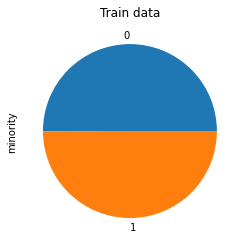

In [10]:
train['minority'].value_counts().plot.pie()
plt.title('Train data')
plt.show()

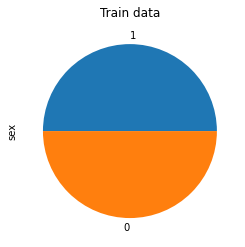

In [11]:
train['sex'].value_counts().plot.pie()
plt.title('Train data')
plt.show()

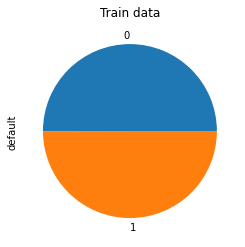

In [12]:
train['default'].value_counts().plot.pie()
plt.title('Train data')
plt.show()

#### Gender

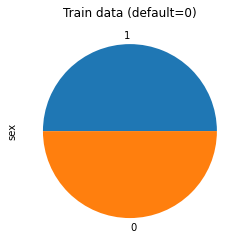

In [13]:
train[train['default']==0]['sex'].value_counts().plot.pie()
plt.title('Train data (default=0)')
plt.show()

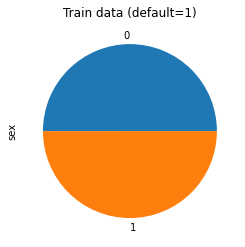

In [14]:
train[train['default']==1]['sex'].value_counts().plot.pie()
plt.title('Train data (default=1)')
plt.show()

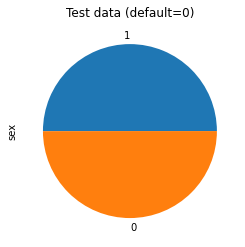

In [15]:
test[test['default']==0]['sex'].value_counts().plot.pie()
plt.title('Test data (default=0)')
plt.show()

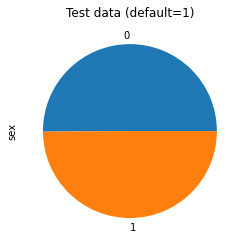

In [16]:
test[test['default']==1]['sex'].value_counts().plot.pie()
plt.title('Test data (default=1)')
plt.show()

#### Minority

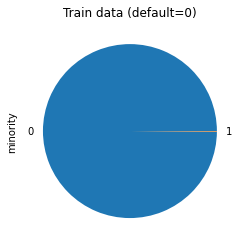

In [17]:
train[train['default']==0]['minority'].value_counts().plot.pie()
plt.title('Train data (default=0)')
plt.show()

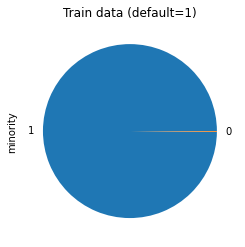

In [18]:
train[train['default']==1]['minority'].value_counts().plot.pie()
plt.title('Train data (default=1)')
plt.show()

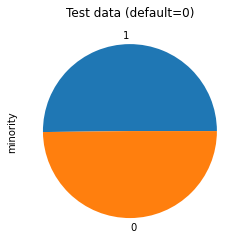

In [19]:
test[test['default']==0]['minority'].value_counts().plot.pie()
plt.title('Test data (default=0)')
plt.show()

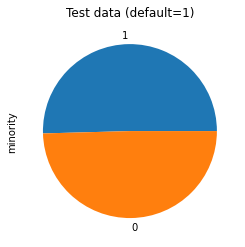

In [20]:
test[test['default']==1]['minority'].value_counts().plot.pie()
plt.title('Test data (default=1)')
plt.show()

## Data Preprocessing
One-hot-encoding of ZIP

In [21]:
zip_df = pd.get_dummies(train['ZIP'], prefix='zip')
train = pd.concat([train, zip_df], axis=1)
train.drop(['ZIP'], axis=1, inplace=True, errors='ignore')
train.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA
0,1,0,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,1,MZ10CD,0,1,0,0
1,1,0,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,1,MZ10CD,0,1,0,0
2,1,0,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,1,MZ10CD,0,1,0,0
3,1,0,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,1,MZ10CD,0,1,0,0
4,1,0,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,1,MZ10CD,0,1,0,0


In [22]:
zip_df = pd.get_dummies(test['ZIP'], prefix='zip')
test = pd.concat([test, zip_df], axis=1)
test.drop(['ZIP'], axis=1, inplace=True, errors='ignore')
test.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,1,MZ10CD,0,1,0,0
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,MZ01CD,0,1,0,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,MZ01CD,0,1,0,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,MZ10CD,0,1,0,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,MZ10CD,0,1,0,0


One-hot-encoding of Occupation

In [23]:
occupation_df = pd.get_dummies(train['occupation'], prefix='occ')
train = pd.concat([train, occupation_df], axis=1)
train.drop(['occupation'], axis=1, inplace=True, errors='ignore')
train.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD
0,1,0,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,1,0,1,0,0,0,1,0
1,1,0,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,1,0,1,0,0,0,1,0
2,1,0,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,1,0,1,0,0,0,1,0
3,1,0,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,1,0,1,0,0,0,1,0
4,1,0,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,1,0,1,0,0,0,1,0


In [24]:
occupation_df = pd.get_dummies(test['occupation'], prefix='occ')
test = pd.concat([test, occupation_df], axis=1)
test.drop(['occupation'], axis=1, inplace=True, errors='ignore')
test.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,1,0,1,0,0,0,1,0
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,0,1,0,0,1,0,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,0,1,0,0,1,0,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,0,1,0,0,0,1,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,0,1,0,0,0,1,0


## Train model

In [25]:
y_train = train.pop('default')
y_test = test.pop('default')

In [26]:
clf = RandomForestClassifier()
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=7)

In [27]:
clf.fit(train, y_train)

RandomForestClassifier()

In [28]:
predictions = clf.predict(test)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86    136055
           1       0.26      0.30      0.28     23945

    accuracy                           0.77    160000
   macro avg       0.57      0.57      0.57    160000
weighted avg       0.78      0.77      0.77    160000



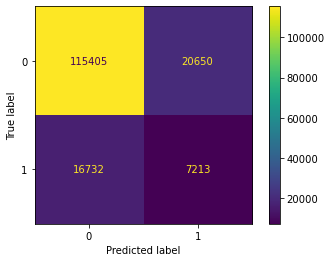

In [30]:
plot_confusion_matrix(clf, test, y_test)

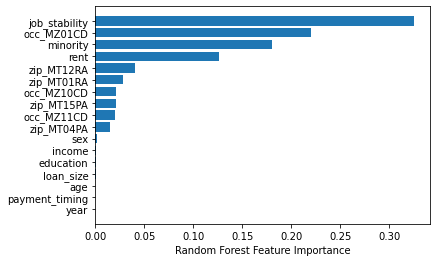

In [31]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(train.columns.values[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [32]:
test['predicted_value'] = predictions
test['true_value'] = y_test
test.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD,predicted_value,true_value
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,0,1,0,0,0,1,0,1,1
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,1,0,0,1,0,0,1,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,1,0,0,1,0,0,1,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,1,0,0,0,1,0,1,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,1,0,0,0,1,0,1,0


array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

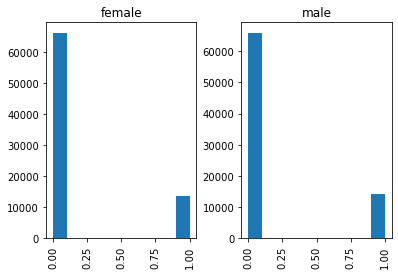

In [33]:
test['sex_label'] = test['sex'].apply(lambda row: 'male' if row == 0 else 'female')
test['predicted_value'].hist(by=test['sex_label'])

array([<AxesSubplot:title={'center':'minority'}>,
       <AxesSubplot:title={'center':'non-minority'}>], dtype=object)

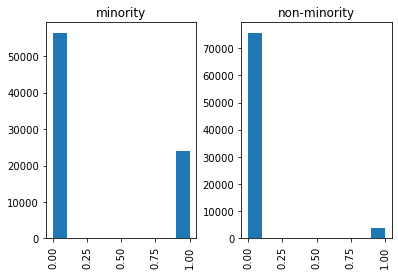

In [34]:
# Prediction
test['minority_label'] = test['minority'].apply(lambda row: 'non-minority' if row == 0 else 'minority')
test['predicted_value'].hist(by=test['minority_label'])

array([<AxesSubplot:title={'center':'minority'}>,
       <AxesSubplot:title={'center':'non-minority'}>], dtype=object)

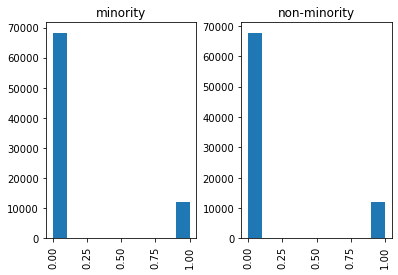

In [35]:
# true values
test['true_value'].hist(by=test['minority_label'])

In [36]:
test.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,...,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD,predicted_value,true_value,sex_label,minority_label
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,...,1,0,0,0,1,0,1,1,male,minority
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,...,1,0,0,1,0,0,1,0,male,non-minority
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,...,1,0,0,1,0,0,1,0,male,non-minority
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,...,1,0,0,0,1,0,1,0,male,minority
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,...,1,0,0,0,1,0,1,0,male,minority


In [37]:
test['correct_prediction_made'] = test.apply(lambda row: row['predicted_value'] == row['true_value'], axis=1)
test.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,...,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD,predicted_value,true_value,sex_label,minority_label,correct_prediction_made
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,...,0,0,0,1,0,1,1,male,minority,True
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,...,0,0,1,0,0,1,0,male,non-minority,False
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,...,0,0,1,0,0,1,0,male,non-minority,False
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,...,0,0,0,1,0,1,0,male,minority,False
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,...,0,0,0,1,0,1,0,male,minority,False


array([<AxesSubplot:title={'center':'minority'}>,
       <AxesSubplot:title={'center':'non-minority'}>], dtype=object)

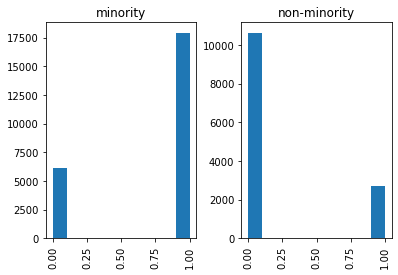

In [38]:
# Plot false predictions by minority
test_false_pred = test[test['correct_prediction_made']==False]
test_false_pred['predicted_value'].hist(by=test_false_pred['minority_label'])

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

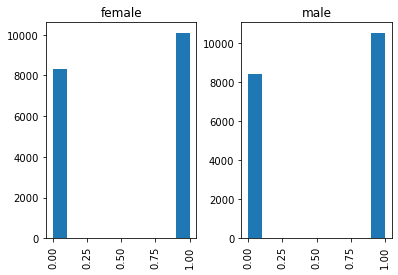

In [39]:
# Plot false predictions by gender
test_false_pred['predicted_value'].hist(by=test_false_pred['sex_label'])

In [40]:
test.drop(['sex_label', 'minority_label'], axis=1, inplace=True, errors='ignore')
test.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD,predicted_value,true_value,correct_prediction_made
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,0,1,0,0,0,1,0,1,1,True
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,1,0,0,1,0,0,1,0,False
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,1,0,0,1,0,0,1,0,False
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,1,0,0,0,1,0,1,0,False
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,1,0,0,0,1,0,1,0,False


In [41]:
test.to_csv('test_predictions.csv', index=False)